In [1]:
import phylustrator as ph
import ete3
import random

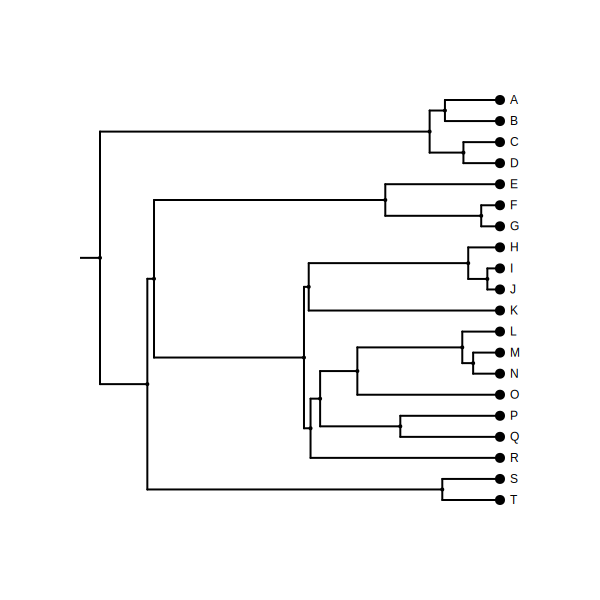

In [2]:
with open("../examples/data/basic/tree.nwk") as f:
    t = ete3.Tree(f.readline())
    
my_style = ph.TreeStyle(
    width=600,
    height=600,
    branch_color="black",
    font_size=12,
    font_family="Arial",
)

v = ph.VerticalTreeDrawer(t, style=my_style)
v.add_leaf_names()
v.draw()
v.d

# Decorating a tree

In [13]:
import ete3
import phylustrator as ph
import random

# 1. Load your tree
# Ensure your Newick file is formatted correctly (format=1 is standard for trees with names and lengths)
with open("../examples/data/basic/tree.nwk") as f:
    t = ete3.Tree(f.readline(), format=1)

# 2. Define your style
# Control dimensions, stroke widths, and default sizes here
my_style = ph.TreeStyle(
    width=600,
    height=600,
    leaf_r=0,               # Radius of leaf tips (0 to hide)
    node_r=0,               # Radius of internal nodes (0 to hide)
    branch_stroke_width=2,  # Thickness of branches
    branch_color="black",
    font_size=12,
    font_family="Arial",
)

# 3. Initialize the Drawer
v = ph.VerticalTreeDrawer(t, style=my_style)

# --- BASE TREE COLORING ---
# Find a target clade (common ancestor of A and D)
target = t.get_common_ancestor("A", "D") 

# Create a color mapping: default blue, target clade green
node_colors = {n: "blue" for n in t.traverse()}
for n in target.traverse():
    node_colors[n] = "green"

# Draw the base tree structure
v.draw(branch2color=node_colors)
v.add_leaf_names()

# --- ADDING MARKERS ---
# Add triangle shapes next to leaves A, B, C, D
v.add_leaf_shapes(
    leaves=["A", "B", "C", "D"],
    shape="triangle",
    fill="blue",
    r=5,                    # Radius of the shape
    stroke="black",
    stroke_width=1,
    offset=35,              # Distance from the leaf tip
)

# Add rotated square shapes for J and M
v.add_leaf_shapes(
    leaves=["J", "M"],
    shape="square",
    fill="orange",
    r=4,                    
    stroke="black",
    stroke_width=1,
    offset=35,
    rotation=45,
)

# Add events along branch 'K' at specific positions (0.0=start, 1.0=end)
events = [
    {"branch": "K", "where": 0.2, "shape": "circle", "fill": "red", "r": 7},        
    {"branch": "K", "where": 0.5, "shape": "circle", "fill": "orange", "r": 7},     
    {"branch": "K", "where": 0.8, "shape": "circle", "fill": "darkgreen", "r": 7},  
]
v.add_branch_shapes(events)

# --- HIGHLIGHTING ---
# Highlight a clade with a shaded background box
target_clade = t.get_common_ancestor("E", "G") 
v.highlight_clade(target_clade, color="orange", opacity=0.4)

# Highlight specific branches
target_branch = t.get_common_ancestor("P", "Q") 
v.highlight_branch(target_branch, color="blue", stroke_width=5)

# Apply a gradient to a branch
target_grad = t.get_common_ancestor("H", "J") 
v.gradient_branch(target_grad, colors=("purple", "red"), stroke_width=6)

# --- TRANSFERS ---
# Plot curved links between lineages
transfer_data = [
    {"from": "E", "to": "A", "freq": 1.0},
]

v.plot_transfers(
    transfer_data,
    curve_type="C",         # Cubic curve
    stroke_width=3,         
    opacity=0.6,
    gradient_colors=("purple", "orange") 
)

# --- AXES & HEATMAPS ---
# Add a time axis at the bottom
v.add_time_axis(
    ticks=[0, 0.5, 1.0, 1.5, 2.0, 2.5], 
    label="Time", 
    y_offset=20  
)

# Add heatmaps (metadata columns) next to the tree
# Column 1: Expression (Blue)
data_col1 = {leaf.name: random.uniform(0, 1) for leaf in t.get_leaves()}
v.add_heatmap(
    data_col1,
    width=15,
    offset=50,
    low_color="white",
    high_color="blue",
    border_color="black",
    border_width=0.5
)

# Column 2: Enrichment (Red)
data_col2 = {leaf.name: random.uniform(0, 100) for leaf in t.get_leaves()}
v.add_heatmap(
    data_col2,
    width=15,
    offset=70,
    low_color="#fff5f0",
    high_color="#67000d",
    border_color="black",
    border_width=0.5
)

# --- LEGENDS ---
v.add_categorical_legend(
    palette={"Blue": "blue", "Green": "green"}, 
    title="Lineage type",
    x=-280, y=-280  # Top-left area
)

v.add_transfer_legend(
    colors=("purple", "orange"),
    x=-150, y=-280  
)

v.add_color_bar(
    low_color="white", 
    high_color="blue", 
    vmin=0, vmax=1, 
    title="Expression",
    x=160, y=-250
)

# Display or Save
# v.d  # Display in Jupyter


In [14]:
# SVG always works
v.save_svg("../examples/figures/vertical_tree.svg")

# PNG requires cairosvg (install: pip install "phylustrator[export]")
v.save_png("../examples/figures/vertical_tree.png", scale=3.0)
